In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN 

## Backpropagation-Through-Time (BPTT) for LDDN Networks

In this section, we will generalize the Backpropagation-Through-Time (BPTT) algorithm for LDDN networks. 

### Generalized Gradient Calculation

The first step is to generalize Eq. (14.15). For the general LDDN network, we can calculate the terms of the gradient by using the chain rule, as in:

$$
\frac{\partial F}{\partial lw_{i,j}^{(d)}} = \sum_{u \in U} \sum_{m=1}^{S_u} \sum_{k=1}^{t=1} \frac{\partial a_k(t)}{\partial n_i(t)} \frac{\partial n_i(t)}{\partial lw_{i,j}^{(d)}}.
$$
(14.46)

Here, $ u $ is an output layer, $ U $ is the set of all output layers, and $ S $ is the number of neurons in layer $ u $.

From Eq. (14.24), we can write:

$$
\frac{\partial n_i(t)}{\partial lw_{i,j}^{(d)}} = a_j(t-d).
$$
(14.47)

We will also define:

$$
\frac{\partial F}{\partial a_k(t)} = \sum_{u \in U} \sum_{m=1}^{S_u} \frac{\partial a_k(t)}{\partial n_i(t)}.
$$
(14.48)

The terms of the gradient for the layer weights can then be expressed as:

$$
\frac{\partial F}{\partial lw_{i,j}^{(d)}} = \sum_{t=1}^{m} d_i(t) a_j(t-d).
$$
(14.49)

Using the sensitivity term defined in Eq. (14.26):

$$
s_{k,i}(t) \equiv \frac{\partial a_k(t)}{\partial n_i(t)},
$$
(14.50)

the elements $ d_i(t) $ can be written as:

$$
d_i(t) = \sum_{u \in U} \sum_{k=1}^{S_u} \frac{\partial F}{\partial a(t)} s_{k,i}(t).
$$
(14.51)

In matrix form, this becomes:

$$
\frac{\partial F}{\partial d(t)} = \sum_{u \in U} \left[ S(t) \right] \frac{\partial a(t)}{\partial t}.
$$
(14.52)

Where

$$
\frac{\partial F}{\partial a(t)} = \begin{bmatrix}
\frac{\partial F}{\partial a_1(t)} \\
\frac{\partial F}{\partial a_2(t)} \\
\vdots \\
\frac{\partial F}{\partial a_{S_u}(t)}
\end{bmatrix}.
$$
(14.53)

Now, the gradient can be written in matrix form:

$$
\frac{\partial F}{\partial LW^{(d)}} = \sum_{t=1}^{m} d(t) \cdot a(t-d).
$$
(14.54)

By similar steps, we can find the derivatives for the biases and input weights.

# Generalization of the BPTT Algorithm

## Derivatives for Weights and Biases

The derivatives for the weights and biases in the LDDN network can be expressed as follows:

$$
\frac{\partial F}{\partial IW^{(d)}} = \sum_{t=1}^{m} d(t) \cdot p(t-d), \quad (14.55)
$$

$$
\frac{\partial F}{\partial b} = \sum_{t=1}^{m} d(t). \quad (14.56)
$$

Equations (14.54) through (14.56) make up the generalization of Eq. (14.15) for the LDDN network.

## Generalization of Eq. (14.17)

The next step in the development of the BPTT algorithm is the generalization of Eq. (14.17). Again, we use the chain rule:

$$
\frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} e_u' + \sum_{u' \in U} \sum_{x \in X} \sum_{d \in DL} \frac{\partial F}{\partial a(t+d)} \frac{\partial a(t+d)}{\partial n(t+d)} \frac{\partial n(t+d)}{\partial a(t)}. \quad (14.57)
$$

(Many of the terms in these summations will be zero. We will provide a more efficient representation later in this section.)

In Eq. (14.17), we only had one delay in the system. Now we need to account for each network output, how that network output is connected back through a network input, and also for the number of times each network output is delayed before it is applied to a network input. This is the reason for the three summations in Eq. (14.57). This equation must be updated backward in time, as $ t $ is varied from $ Q $ to $ 1 $.

The terms 

$$
\frac{\partial F}{\partial a(t)} \quad (14.58)
$$

are generally set to zero for $ t > Q $.

If we consider the matrix in the brackets on the right side of Eq. (14.57), from Eq. (14.29), we can write:

$$
\frac{\partial a(t+d)}{\partial n(t+d)} = S(t+d) \cdot LW(d). \quad (14.59)
$$

This allows us to write Eq. (14.57) as:

### Generalization of the BPTT Algorithm

### Derivatives for Weights and Biases

The derivatives for the weights and biases in the LDDN network can be expressed as follows:

$$
\frac{\partial F}{\partial IW^{(d)}} = \sum_{t=1}^{m} d(t) \cdot p(t-d), \quad (14.55)
$$

$$
\frac{\partial F}{\partial b} = \sum_{t=1}^{m} d(t). \quad (14.56)
$$

Equations (14.54) through (14.56) make up the generalization of Eq. (14.15) for the LDDN network.

## Generalization of Eq. (14.17)

The next step in the development of the BPTT algorithm is the generalization of Eq. (14.17). Again, we use the chain rule:

$$
\frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} e_u' + \sum_{u' \in U} \sum_{x \in X} \sum_{d \in DL} \frac{\partial F}{\partial a(t+d)} \frac{\partial a(t+d)}{\partial n(t+d)} \frac{\partial n(t+d)}{\partial a(t)}. \quad (14.57)
$$

(Many of the terms in these summations will be zero. We will provide a more efficient representation later in this section.)

In Eq. (14.17), we only had one delay in the system. Now we need to account for each network output, how that network output is connected back through a network input, and also for the number of times each network output is delayed before it is applied to a network input. This is the reason for the three summations in Eq. (14.57). This equation must be updated backward in time, as $ t $ is varied from $ Q $ to $ 1 $.

The terms 

$$
\frac{\partial F}{\partial a(t)} \quad (14.58)
$$

are generally set to zero for $ t > Q $.

If we consider the matrix in the brackets on the right side of Eq. (14.57), from Eq. (14.29), we can write:

$$
\frac{\partial a(t+d)}{\partial n(t+d)} = S(t+d) \cdot LW(d). \quad (14.59)
$$

This allows us to write Eq. (14.57) as:

## Efficient Implementation of Eq. (14.60)

The generalization of Eq. (14.60) can be expressed as:

$$
\frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} e_u' + \sum_{u' \in U} \sum_{x \in X} \sum_{d \in DL} \left[ S(t + d) \times LW(d) \right] \frac{\partial a(t + d)}{\partial n(t + d)}. \quad (14.60)
$$

Many of the terms in the summation on the right-hand side of Eq. (14.60) will be zero and will not have to be computed. To provide a more efficient implementation of Eq. (14.60), we define the following indicator sets:

1. **Set of Input Layers:**
   $$ 
   E_{LW}(u) = \{ x \in X \ | \ \exists (LW(d) \neq 0, d \neq 0) \} \quad (14.61)
   $$

2. **Set of Output Layers:**
   $$
   E_S(x) = \{ u \in U \ | \ \exists (S \neq 0) \} \quad (14.62)
   $$

The first set $ E_{LW}(u) $ contains all of the input layers that have a connection from output layer $ u $ with at least some nonzero delay. The second set $ E_S(x) $ contains output layers that have a nonzero sensitivity with input layer $ x $. When the sensitivity $ S $ is nonzero, there is a static connection from input layer $ x $ to output layer $ u $.

We can now rearrange the order of the summation in Eq. (14.60) and sum only over the existing terms:

$$
\frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} e_u' + \sum_{x \in E_{LW}(u)} \sum_{u' \in E_S(x)} \sum_{d \in DL} LW(d) S(t + d) \frac{\partial a(t + d)}{\partial n(t + d)}. \quad (14.63)
$$



### Backpropagation-Through-Time (BPTT) Initialization and Gradient Computation

### Initialization
Initialize the gradient:

$$
\frac{\partial F}{\partial a(t)} = 0, \quad t > Q, \quad \text{for all } u \in U. 
$$

For $ t = Q $ to $ 1 $:

- Set $ U' = \emptyset $
- Set $ E_S(u) = \emptyset $ for all $ u \in U $

For $ m $ decremented through the backpropagation order:

For all $ u \in U' $:

- If $ E_S(u) \cap L_m \neq \emptyset $:

$$
S(t) = \sum_{l \in E_S(u) \cap L_m} F \cdot (n(t))_{u,m}
$$

- Add $ m $ to the set $ E_S(u) $
- Add $ u $ to the set $ E_S(m) $

End For $ u $

If $ m \in U $:

$$
S(t) = F \cdot (n(t))_{m,m}
$$

- Add \( m \) to the sets \( U', E_S(m) \), and \( E_S(m) \)

End If \( m \)

End For \( m \)

For \( u \in U \) decremented through the backpropagation order:

$$
\frac{\partial F}{\partial a(t)} e_{x,u}^T e_{u',x}^T \frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} + \sum_{x \in E_{LW}(u)} \sum_{u' \in E_S(x)} \sum_{d \in DL} LW(d) S(t + d) \frac{\partial a(t + d)}{\partial n(t + d)}.
$$

End For \( u \)

## Compute Gradients
For all layers \( m \):

$$
\frac{\partial F}{\partial d(t)} = \sum_{u \in E_S(m)} S(t) \frac{\partial a(t)}{\partial n(t)}.
$$

For $ t = 1 $ to $ Q $:

$$
\frac{\partial F}{\partial LW(d)}_{m,l} = \sum_{t=1}^Q d(t) \cdot [a(t - d)], \quad (14.54)
$$

$$
\frac{\partial F}{\partial IW(d)}_{m,l} = \sum_{t=1}^Q d(t) \cdot [p(t - d)], \quad (14.55)
$$

$$
\frac{\partial F}{\partial b} = \sum_{t=1}^Q d(t). \quad (14.56)
$$


In [1]:
# Backpropagation-Through-Time (BPTT) Implementation for Long Delay Dynamic Networks (LDDN)

# Initialize parameters and network structure
def initialize_network(num_layers, layer_sizes):
    """
    Initializes the weights and biases of the network.

    Args:
        num_layers: Number of layers in the network.
        layer_sizes: A list containing the size of each layer.

    Returns:
        weights: A list of weight matrices for each layer.
        biases: A list of bias vectors for each layer.
    """
    weights = []
    biases = []
    for i in range(num_layers - 1):
        weights.append([[0.01] * layer_sizes[i + 1] for _ in range(layer_sizes[i])])
        biases.append([0.01] * layer_sizes[i + 1])
    return weights, biases

def forward_pass(input_data, weights, biases):
    """
    Performs a forward pass through the network.

    Args:
        input_data: Input data for the network.
        weights: Weight matrices of the network.
        biases: Bias vectors of the network.

    Returns:
        output: The output of the network.
    """
    activations = input_data
    for w, b in zip(weights, biases):
        activations = [sum(wi * ai for wi, ai in zip(w_row, activations)) + bi for w_row, bi in zip(w, b)]
    return activations

def compute_gradients(Q, U, weights, biases, inputs, targets):
    """
    Computes gradients using Backpropagation-Through-Time (BPTT).

    Args:
        Q: The maximum time step.
        U: Set of output layers.
        weights: Weights of the network.
        biases: Biases of the network.
        inputs: Input data over time.
        targets: Target output data over time.

    Returns:
        weight_gradients: Gradients for the weights.
        bias_gradients: Gradients for the biases.
    """
    # Initialize gradients
    weight_gradients = [[[0 for _ in range(len(weights[i][0]))] for _ in range(len(weights[i]))] for i in range(len(weights))]
    bias_gradients = [[0 for _ in range(len(biases[i]))] for i in range(len(biases))]

    # Backpropagation
    for t in range(Q, 0, -1):
        # Example of output layer error calculation
        output_errors = [targets[t-1][u] - outputs[t-1][u] for u in U]

        for u in U:
            # Backpropagate errors
            for i in range(len(weights) - 1, -1, -1):
                for j in range(len(weights[i])):
                    for k in range(len(weights[i][j])):
                        weight_gradients[i][j][k] += output_errors[u] * inputs[t-1][j]
                bias_gradients[i][u] += output_errors[u]

    return weight_gradients, bias_gradients

# Example usage
num_layers = 3
layer_sizes = [5, 4, 3]  # Example sizes of each layer
weights, biases = initialize_network(num_layers, layer_sizes)

# Generate example input and target data
inputs = [[0.5, 0.1, 0.2, 0.3, 0.4] for _ in range(10)]  # Dummy input data over time
targets = [[0.1, 0.2, 0.3] for _ in range(10)]  # Dummy target output data over time
Q = len(inputs)  # Set Q as the number of time steps
U = range(layer_sizes[-1])  # Output layer indices

# Forward pass
outputs = [forward_pass(input_data, weights, biases) for input_data in inputs]

# Compute gradients
weight_gradients, bias_gradients = compute_gradients(Q, U, weights, biases, inputs, targets)

# Print gradients for verification
print("Weight Gradients:", weight_gradients)
print("Bias Gradients:", bias_gradients)


Weight Gradients: [[[2.84055, 2.84055, 2.84055, 2.84055], [0.5681099999999998, 0.5681099999999998, 0.5681099999999998, 0.5681099999999998], [1.1362199999999996, 1.1362199999999996, 1.1362199999999996, 1.1362199999999996], [1.7043299999999995, 1.7043299999999995, 1.7043299999999995, 1.7043299999999995], [2.272439999999999, 2.272439999999999, 2.272439999999999, 2.272439999999999]], [[2.84055, 2.84055, 2.84055], [0.5681099999999998, 0.5681099999999998, 0.5681099999999998], [1.1362199999999996, 1.1362199999999996, 1.1362199999999996], [1.7043299999999995, 1.7043299999999995, 1.7043299999999995]]]
Bias Gradients: [[0.8936999999999999, 1.8937000000000002, 2.8936999999999995, 0], [0.8936999999999999, 1.8937000000000002, 2.8936999999999995]]


# Example BPTT Implementations (FIR and IIR)

To demonstrate the BPTT algorithm, we will use the same example networks that we used for the RTRL algorithm. First, we use the feedforward dynamic network of Figure 14.2. We defined the network architecture on page 14-18.

Before the gradient can be computed using BPTT, the network response must be computed for all time steps:

$$
\begin{align*}
a^{(1)} &= n^{(1)} = iw_{1,1}(0)p(1) + iw_{1,1}(1)p(0) + iw_{1,1}(2)p(-1), \\
a^{(2)} &= n^{(2)} = iw_{1,1}(0)p(2) + iw_{1,1}(1)p(1) + iw_{1,1}(2)p(0), \\
a^{(3)} &= n^{(3)} = iw_{1,1}(0)p(3) + iw_{1,1}(1)p(2) + iw_{1,1}(2)p(1).
\end{align*}
$$

The BPTT algorithm begins with some initialization:

$$
\begin{align*}
U' &= \emptyset, \\
E S(1) &= \emptyset, \\
E S(1) &= \emptyset.
\end{align*}
$$

The first step in the derivative calculation will be the sensitivity calculation. For BPTT, we start at the last time point \( t = 3 \):

$$
S_{1,1}^{(3)} = F' \left( n^{(3)} \right) = 1,
$$

since the transfer function is linear. We also update the following sets:

$$
E S(1) = \{1\}, \quad E S(1) = \{1\}.
$$

The next step is the calculation of the following derivative using Eq. (14.63):

$$
\frac{\partial F}{\partial a^{(3)}} = -2e^{(3)}.
$$

The final step for \( t = 3 \) is given by Eq. (14.52):

$$
\frac{\partial F}{\partial d^{(3)}} = \left[ S(3) \right] \cdot \frac{1}{\partial a^{(3)}} = -2e^{(3)}.
$$

We repeat the previous steps for \( t = 2 \) and \( t = 1 \), to obtain:

$$
\begin{align*}
\frac{\partial F}{\partial d^{(2)}} &= \left[ S(2) \right] \cdot \frac{1}{\partial a^{(2)}} = -2e^{(2)}, \\
\frac{\partial F}{\partial d^{(1)}} &= \left[ S(1) \right] \cdot \frac{1}{\partial a^{(1)}} = -2e^{(1)}.
\end{align*}
$$

# Combining All Time Steps in BPTT

All time steps are combined in Eq. (14.55):

$$
\begin{align*}
\frac{\partial F}{\partial IW(0)_{1,1}} &= \frac{\partial F}{\partial iw_{1,1}(0)} = \sum_{t=1}^{3} d(t) \times [p(t)] = \sum_{t=1}^{3} -2e(t) \times p(t), \\
\frac{\partial F}{\partial IW(1)_{1,1}} &= \frac{\partial F}{\partial iw_{1,1}(1)} = \sum_{t=1}^{3} d(t) \times [p(t-1)] = \sum_{t=1}^{3} -2e(t) \times p(t-1), \\
\frac{\partial F}{\partial IW(2)_{1,1}} &= \frac{\partial F}{\partial iw_{1,1}(2)} = \sum_{t=1}^{3} d(t) \times [p(t-2)] = \sum_{t=1}^{3} -2e(t) \times p(t-2).
\end{align*}
$$

Note that this is the same result we obtained for the RTRL algorithm example on page 14-19. RTRL and BPTT should always produce the same gradient. The only difference is in the implementation.

## Example with a Recurrent Neural Network

Now, let’s use our previous recurrent neural network example from Figure 14.4. We defined the architecture of this network on page 14-19. Unlike the RTRL algorithm, where initial conditions for the derivatives must be provided, the BPTT algorithm requires final conditions for the derivatives:

$$
\frac{\partial a(4)}{\partial iw_{1,1}} \quad \text{and} \quad \frac{\partial a(4)}{\partial lw_{1,1}(1)},
$$

which are normally set to zero.

The network response is computed for all time steps:

$$
\begin{align*}
a(1) &= lw_{1,1}(1) a(0) + iw_{1,1} p(1), \\
a(2) &= lw_{1,1}(1) a(1) + iw_{1,1} p(2), \\
a(3) &= lw_{1,1}(1) a(2) + iw_{1,1} p(3).
\end{align*}
$$

The derivative calculation begins with:

$$
S_{1,1}^{(3)} = F' \left( n^{(3)} \right) = 1,
$$

since the transfer function is linear. We also update the following sets:

$$
E S(1) = \{1\}, \quad E S(1) = \{1\}.
$$

Next, we compute the following derivative using Eq. (14.63):

$$
\frac{\partial F}{\partial a^{(3)}} = -2e^{(3)}.
$$


# Combining All Time Steps in BPTT

All time steps are combined in Eq. (14.55):

$$
\begin{align*}
\frac{\partial F}{\partial IW(0)_{1,1}} &= \sum_{t=1}^{3} d(t) \times p(t) = \sum_{t=1}^{3} -2e(t) \times p(t), \\
\frac{\partial F}{\partial IW(1)_{1,1}} &= \sum_{t=1}^{3} d(t) \times p(t-1) = \sum_{t=1}^{3} -2e(t) \times p(t-1), \\
\frac{\partial F}{\partial IW(2)_{1,1}} &= \sum_{t=1}^{3} d(t) \times p(t-2) = \sum_{t=1}^{3} -2e(t) \times p(t-2).
\end{align*}
$$

Note that this is the same result we obtained for the RTRL algorithm example on page 14-19. RTRL and BPTT should always produce the same gradient. The only difference is in the implementation.

## Example with a Recurrent Neural Network

Now, let’s use our previous recurrent neural network example from Figure 14.4. We defined the architecture of this network on page 14-19. Unlike the RTRL algorithm, where initial conditions for the derivatives must be provided, the BPTT algorithm requires final conditions for the derivatives:

$$
\frac{\partial a(4)}{\partial iw_{1,1}} \quad \text{and} \quad \frac{\partial a(4)}{\partial lw_{1,1}(1)},
$$

which are normally set to zero.

The network response is computed for all time steps:

$$
\begin{align*}
a(1) &= lw_{1,1}(1) a(0) + iw_{1,1} p(1), \\
a(2) &= lw_{1,1}(1) a(1) + iw_{1,1} p(2), \\
a(3) &= lw_{1,1}(1) a(2) + iw_{1,1} p(3).
\end{align*}
$$

The derivative calculation begins with:

$$
S_{1,1}^{(3)} = F' \left( n^{(3)} \right) = 1,
$$

since the transfer function is linear. We also update the following sets:

$$
E S(1) = \{1\}, \quad E S(1) = \{1\}.
$$

Next, we compute the following derivative using Eq. (14.63):

$$
\frac{\partial F}{\partial a^{(3)}} = -2e^{(3)}.
$$

# Computing Gradients in BPTT

The gradient is computed using:

$$
\frac{\partial F}{\partial a(t)} = \frac{\partial F}{\partial a(t)} + LW(1) \cdot S(t+1) \cdot \frac{\partial F}{\partial a(t+1)}
$$

For \( t = 3 \), we have:

$$
\frac{\partial F}{\partial a(3)} = \frac{\partial F}{\partial a(3)} + lw_{1,1}(1)S(4) \cdot \frac{\partial F}{\partial a(4)} = -2e(3) \frac{\partial F}{\partial a(3)}
$$

And:

$$
d(3) = [S(3)] \cdot \frac{\partial F}{\partial a(3)} = -2e(3)
$$

### Continuing to \( t = 2 \):

$$
S_{1,1}^{(2)} = F'(n^{(2)}) = 1,
$$

so:

$$
\frac{\partial F}{\partial a(2)} = \frac{\partial F}{\partial a(2)} + lw_{1,1}(1) S(3) \cdot \frac{\partial F}{\partial a(3)} = -2e(2) + lw_{1,1}(1) \cdot (-2e(3))
$$

And:

$$
d(2) = [S(2)] \cdot \frac{\partial F}{\partial a(2)} = -2e(2) + lw_{1,1}(1) \cdot (-2e(3))
$$

### Finally, for \( t = 1 \):

$$
S_{1,1}^{(1)} = F'(n^{(1)}) = 1,
$$

so:

$$
\frac{\partial F}{\partial a(1)} = \frac{\partial F}{\partial a(1)} + lw_{1,1}(1) S(2) \cdot \frac{\partial F}{\partial a(2)} = -2e(1) + lw_{1,1}(1) \cdot (-2e(2)) + lw_{1,1}(1)^2 \cdot (-2e(3))
$$

And:

$$
d(1) = [S(1)] \cdot \frac{\partial F}{\partial a(1)} = -2e(1) + lw_{1,1}(1) \cdot (-2e(2)) + lw_{1,1}(1)^2 \cdot (-2e(3))
$$

### Derivatives with Respect to Weights

For the weights, we calculate:

$$
\frac{\partial F}{\partial LW(1)_{1,1}} = \sum_{t=1}^{2} d(t) \cdot a(t-1)
$$

Expanding for \( t = 1, 2, 3 \):

$$
= a(0) \left[ -2e(1) + lw_{1,1}(1) \cdot (-2e(2)) + lw_{1,1}(1)^2 \cdot (-2e(3)) \right] + a(1) \left[ -2e(2) + lw_{1,1}(1) \cdot (-2e(3)) \right] + a(0) \cdot (-2e(3))
$$

For input weights, we get:

$$
\frac{\partial F}{\partial IW(0)_{1,1}} = \sum_{t=1}^{2} d(t) \cdot p(t)
$$

This expands as:

$$
p(1) \left[ -2e(1) + lw_{1,1}(1) \cdot (-2e(2)) + lw_{1,1}(1)^2 \cdot (-2e(3)) \right] + p(2) \left[ -2e(2) + lw_{1,1}(1) \cdot (-2e(3)) \right] + p(3) \cdot (-2e(3))
$$

### Total Gradient

Now, we can compute the total gradient using Eq. (14.54) and Eq. (14.55):

$$
\frac{\partial F}{\partial \theta} = \sum_{t=1}^{T} \frac{\partial F}{\partial a(t)}.
$$



In [2]:
# Define helper functions for forward pass and gradient computation

def forward_pass(x, W_in, W_rec, W_out, a_prev):
    """
    Perform the forward pass for a simple RNN
    Args:
        x: input vector at time step t
        W_in: input-to-hidden weight matrix
        W_rec: recurrent weight matrix
        W_out: hidden-to-output weight matrix
        a_prev: previous hidden state
    
    Returns:
        a: current hidden state
        y: output at time step t
    """
    a = W_in * x + W_rec * a_prev  # Compute hidden state
    y = W_out * a                  # Compute output
    return a, y

def backward_pass(e, a, W_rec, d_next):
    """
    Perform the backward pass to compute gradients
    Args:
        e: error at time step t
        a: hidden state at time step t
        W_rec: recurrent weight matrix
        d_next: gradient from the next time step
    
    Returns:
        d: gradient at time step t
    """
    d = -2 * e + W_rec * d_next   # Compute the gradient
    return d

# Define parameters
T = 3  # Number of time steps
x = [1.0, 0.5, 0.2]  # Example input sequence
W_in = 0.8           # Input weight
W_rec = 0.5          # Recurrent weight
W_out = 0.3          # Output weight
a = [0.0] * T        # Initialize hidden states
y = [0.0] * T        # Initialize outputs
e = [0.0] * T        # Initialize errors
d = [0.0] * T        # Initialize gradients

# Perform the forward pass
a_prev = 0
for t in range(T):
    a[t], y[t] = forward_pass(x[t], W_in, W_rec, W_out, a_prev)
    a_prev = a[t]
    # Example error: (target - output)
    e[t] = 1.0 - y[t]  # Target is assumed to be 1.0 for simplicity

# Perform the backward pass (BPTT)
d_next = 0
for t in reversed(range(T)):
    d[t] = backward_pass(e[t], a[t], W_rec, d_next)
    d_next = d[t]

# Output gradients
print("Gradients at each time step:", d)


Gradients at each time step: [-2.6959999999999997, -2.352, -1.664]


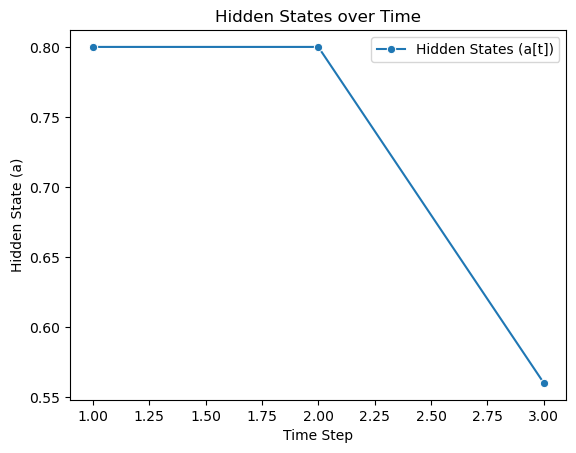

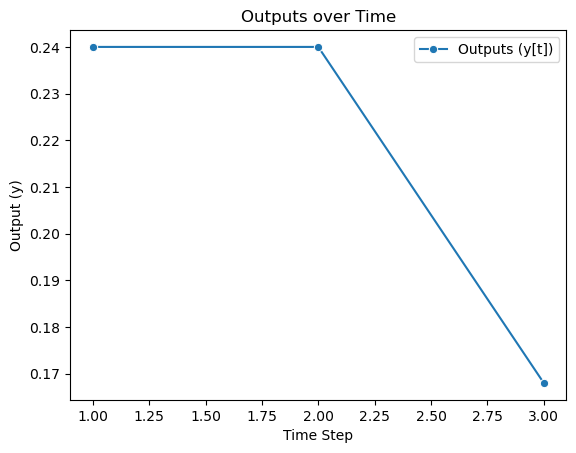

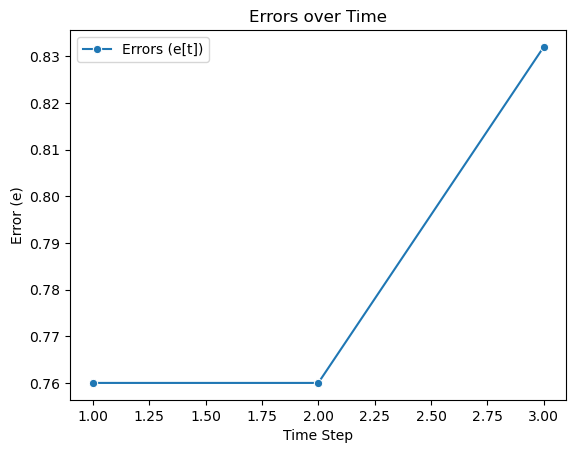

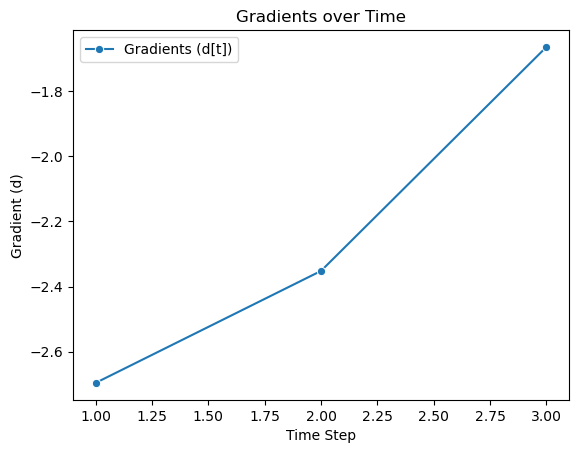

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define helper functions for forward pass and gradient computation

def forward_pass(x, W_in, W_rec, W_out, a_prev):
    """
    Perform the forward pass for a simple RNN
    Args:
        x: input vector at time step t
        W_in: input-to-hidden weight matrix
        W_rec: recurrent weight matrix
        W_out: hidden-to-output weight matrix
        a_prev: previous hidden state
    
    Returns:
        a: current hidden state
        y: output at time step t
    """
    a = W_in * x + W_rec * a_prev  # Compute hidden state
    y = W_out * a                  # Compute output
    return a, y

def backward_pass(e, a, W_rec, d_next):
    """
    Perform the backward pass to compute gradients
    Args:
        e: error at time step t
        a: hidden state at time step t
        W_rec: recurrent weight matrix
        d_next: gradient from the next time step
    
    Returns:
        d: gradient at time step t
    """
    d = -2 * e + W_rec * d_next   # Compute the gradient
    return d

# Define parameters
T = 3  # Number of time steps
x = [1.0, 0.5, 0.2]  # Example input sequence
W_in = 0.8           # Input weight
W_rec = 0.5          # Recurrent weight
W_out = 0.3          # Output weight
a = [0.0] * T        # Initialize hidden states
y = [0.0] * T        # Initialize outputs
e = [0.0] * T        # Initialize errors
d = [0.0] * T        # Initialize gradients

# Perform the forward pass
a_prev = 0
for t in range(T):
    a[t], y[t] = forward_pass(x[t], W_in, W_rec, W_out, a_prev)
    a_prev = a[t]
    # Example error: (target - output)
    e[t] = 1.0 - y[t]  # Target is assumed to be 1.0 for simplicity

# Perform the backward pass (BPTT)
d_next = 0
for t in reversed(range(T)):
    d[t] = backward_pass(e[t], a[t], W_rec, d_next)
    d_next = d[t]

# Plot the results using Seaborn

# Set up the data for plotting
time_steps = list(range(1, T + 1))

# Plot hidden states (a[t])
sns.lineplot(x=time_steps, y=a, marker='o', label='Hidden States (a[t])')
plt.title('Hidden States over Time')
plt.xlabel('Time Step')
plt.ylabel('Hidden State (a)')
plt.show()

# Plot outputs (y[t])
sns.lineplot(x=time_steps, y=y, marker='o', label='Outputs (y[t])')
plt.title('Outputs over Time')
plt.xlabel('Time Step')
plt.ylabel('Output (y)')
plt.show()

# Plot errors (e[t])
sns.lineplot(x=time_steps, y=e, marker='o', label='Errors (e[t])')
plt.title('Errors over Time')
plt.xlabel('Time Step')
plt.ylabel('Error (e)')
plt.show()

# Plot gradients (d[t])
sns.lineplot(x=time_steps, y=d, marker='o', label='Gradients (d[t])')
plt.title('Gradients over Time')
plt.xlabel('Time Step')
plt.ylabel('Gradient (d)')
plt.show()


Summary and Comments on Dynamic Training The RTRL and BPTT algorithms represent two methods for computing the gradients for dynamic networks. Both algorithms compute the exact gradi- ent, and therefore they produce the same final results. The RTRL algo- rithm performs the calculations from the first time point forward, which is suitable for on-line (real-time) implementation. The BPTT algorithm starts from the last time point and works backward in time. The BPTT algorithm generally requires fewer computations for the gradient calculation than RTRL, but BPTT usually requires more memory storage. In addition to the gradient, versions of BPTT and RTRL can be used to com- pute Jacobian matrices, as are needed in the Levenberg-Marquardt de- scribed in Chapter 12. For Jacobian calculations, the RTRL algorithm is generally more efficient that the BPTT algorithm. See [DeHa07] for details. Once the gradients or Jacobians are computed, many standard optimiza- tion algorithms can be used to train the networks. However, training dy- namic networks is generally more difficult than training feedforward networksfor a number of reasons. First, a recurrent net can be thought of as a feedforward network, in which the recurrent network is unfolded in time. For example, consider the simple single-layer recurrent network of Figure 14.4. If this network were to be trained over five time steps, we could unfold the network to create 5 layers - one for each time step. If a sig- moid transfer function is used, then if the output of the network is near the saturation point for any time point, the resulting gradient could be quite small. Another problem in training dynamic networks is the shape of the error surface. It has been shown (see [PhHa13]) that the error surfaces of recur- rent networks can have spurious valleys that are not related to the dynam-


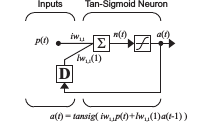
Figure.9 Nonlinear Recurrent Network



## Instabilities in Recurrent Networks

Recurrent networks have the potential for instabilities. For instance, in the network of Figure .4, the system becomes unstable if the weight $ lw_{1,1}(1) $ is greater than one in magnitude. However, for specific input sequences, the network output may remain small even if $ lw_{1,1}(1) $ exceeds one, or if certain combinations of $ lw_{1,1}(1) $ and $ iw_{1,1} $ are present.

It can also be challenging to obtain adequate training data for dynamic networks. Unlike static networks, which depend only on the current input, dynamic networks rely on the history of the input sequence. Therefore, the data used to train the network must represent all situations in terms of input ranges and time variations.

### Nonlinear Recurrent Network

$$
a(t) = \tanh(iw_{1,1} \cdot p(t) + lw_{1,1}(1) \cdot a(t-1))
$$

where $ p(t) $ is the input sequence and $ a(t) $ is the output (or hidden state). The network weights are given by:

$$
lw_{1,1}(1) = 0.5, \quad iw_{1,1} = 0.5
$$

### Training Dynamic Networks

To train a dynamic network, the input sequence must be representative of all possible scenarios. In this simple case, we can use a standard form of input sequence called the **skyline function**, which consists of pulses of varying heights and widths.

### Input and Target Sequences

Below is a visualization of the input and target sequences, where circles represent the input sequence and dots represent the target sequence. The targets were generated by applying the input sequence to the network described above.


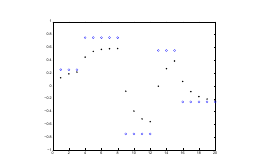

Figure.10 Input and Target Sequences

### Performance Surface

The squared error performance surface for this problem is shown below:

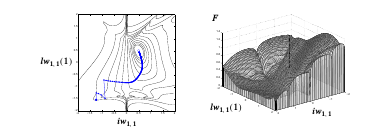
Figure.11 Performance Surface and Steepest Descent Trajectory


As the weight $ lw_{1,1}(1) $ becomes greater than one in magnitude, the squared error grows steeply. If the training sequence were longer, this effect would be more pronounced. Narrow valleys appear in the surface for values of $ lw_{1,1}(1) $ greater than one. These valleys can affect training, causing the trajectory to be trapped or misdirected.

### Conclusion

The narrow valleys are common in recurrent networks, and their cause can be investigated further (see Exercise E14.18). The steepest descent path in the figure illustrates how the trajectory can be misdirected due to these valleys.




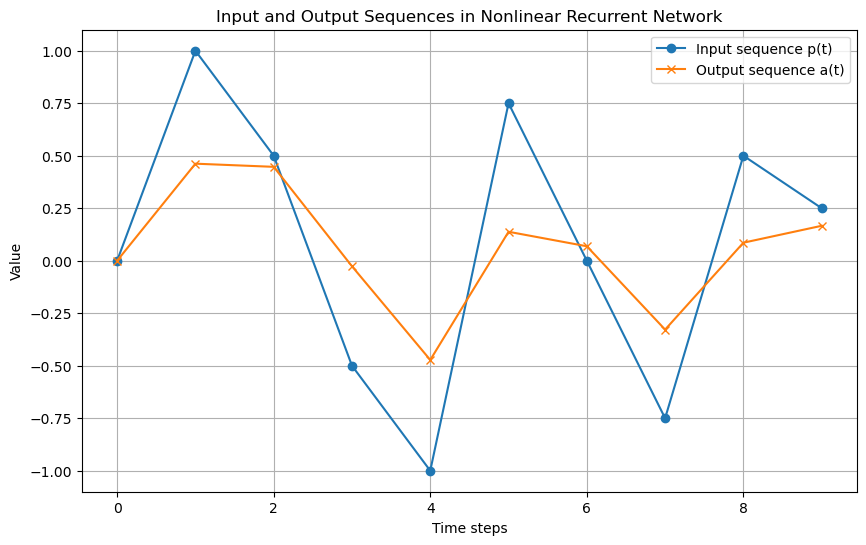

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the input sequence (skyline function)
# Example: a simple pulse-like input signal
p = [0, 1, 0.5, -0.5, -1, 0.75, 0, -0.75, 0.5, 0.25]  # Input sequence

# Step 2: Initialize parameters
iw = 0.5  # input weight iw_1,1
lw = 0.5  # recurrent weight lw_1,1
a = [0]   # Initial state for a(t-1), assume a(0) = 0

# Step 3: Implement the recurrent network dynamics
for t in range(1, len(p)):
    # Apply the recurrent equation to calculate a(t)
    a_t = np.tanh(iw * p[t] + lw * a[-1])
    a.append(a_t)

# Step 4: Plot the input and output sequences
time_steps = range(len(p))

plt.figure(figsize=(10, 6))
plt.plot(time_steps, p, label='Input sequence p(t)', marker='o')
plt.plot(time_steps, a, label='Output sequence a(t)', marker='x')

plt.title('Input and Output Sequences in Nonlinear Recurrent Network')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



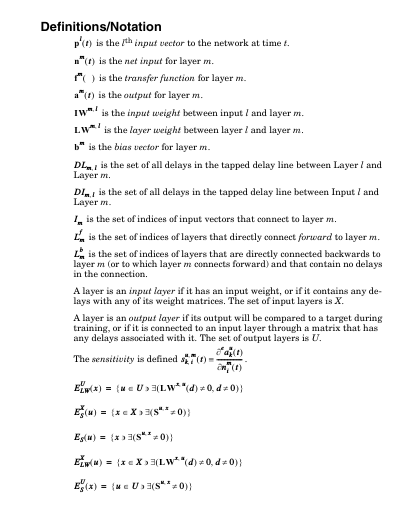

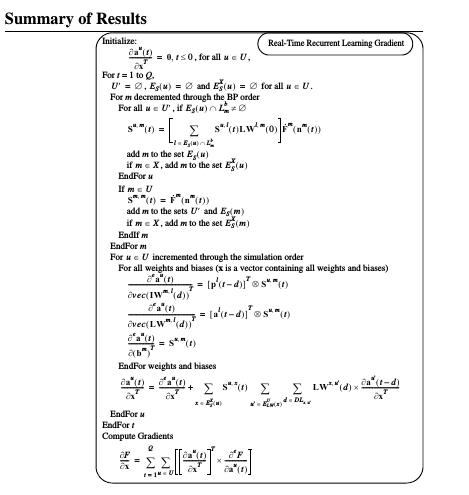

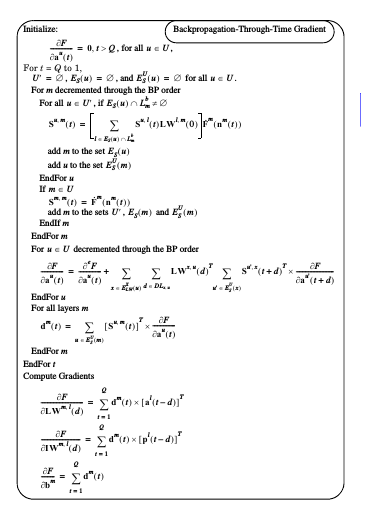
